In [1]:
import numpy as np
import pim_tmr as pim
import fibernet

In [ ]:
N = 500
n = 32
m = 288*n

A = np.random.rand(N,n)*np.exp(1j*2*np.pi*np.random.rand(N,n))
X = np.random.rand(n,m)*np.exp(1j*2*np.pi*np.random.rand(n,m))
B = np.abs(np.dot(A, X))

X_est = pim.pim_tmr(A, B)
B_est = np.abs(np.dot(A, X_est))
print(f"MSE Bs: {pim.mse(B, B_est):0.3e}")

In [2]:
import mat73
import os
from scipy.io import loadmat

path = "C:\\Users\\saucourt\\Datasets"
file = "L_36_15_02_30k_crop2.mat"

# data = mat73.loadmat(os.path.join(path, file))
data = loadmat(os.path.join(path, file))

In [4]:
CP = data['CP'].flatten()
vec = data['vecteur_36'].flatten()

NN = len(CP.flatten())
As = np.zeros(shape=(np.prod(vec.shape), 32), dtype=complex)
Bs = np.zeros(shape=(np.prod(CP.shape), 96*96), dtype=float)

amp = fibernet.dataset._utils.make_bellshaped_plane_2d(vec[0].reshape((6,6)))
amp = amp.flatten()

for i in range(NN):
    phi = vec[i]
    phi = amp * np.exp(1j * phi)
    phi = np.delete(vec[i], [0, 5, 30, 35])
    img = CP[i][16:112, 16:112].flatten().astype('float')
    As[i,:] = np.exp(1j*phi)
    Bs[i,:] = np.sqrt(img)

Bs = Bs/np.max(Bs)

In [39]:
N = 500
As_crop = As[:N, :]
Bs_crop = Bs[:N, :]

X_est = pim.pim_tmr(As_crop, Bs_crop, max_iter=200, tol=1e-1, tol_stag=1e-3)
B_est = np.abs(np.dot(As_crop, X_est))
print(f"MSE Bs: {pim.mse(Bs_crop, B_est):0.3e}")

    0 2.3000e-02 1.9939e+03  9216
    1 2.2441e-02 1.9682e+03  9216
    2 2.1927e-02 1.9443e+03  9216
    3 2.1454e-02 1.9222e+03  9216
    4 2.1020e-02 1.9018e+03  9216
    5 2.0616e-02 1.8829e+03  9216
    6 2.0234e-02 1.8651e+03  9216
    7 1.9870e-02 1.8482e+03  9216
    8 1.9518e-02 1.8320e+03  9216
    9 1.9175e-02 1.8163e+03  9216


KeyboardInterrupt: 

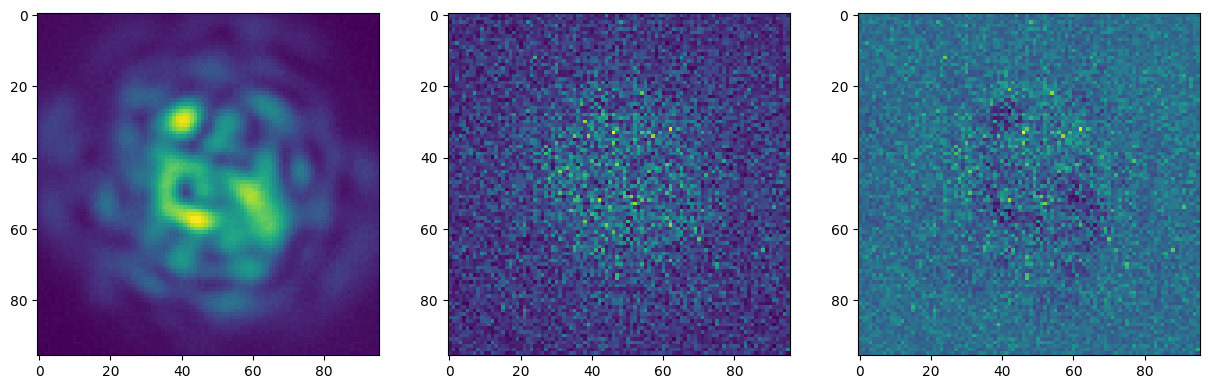

In [42]:
import matplotlib.pyplot as plt

idx = 10
A_init = As_crop[idx,:]
B_model = np.abs(np.dot(X_est.T, A_init)).reshape((96,96))
B_init = Bs_crop[idx,:].reshape((96,96))


fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(B_init)
axs[1].imshow(B_model)
axs[2].imshow(B_model - B_init)
# axs[0].colorbar()
# # axs[0].imshow(B_init)